# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


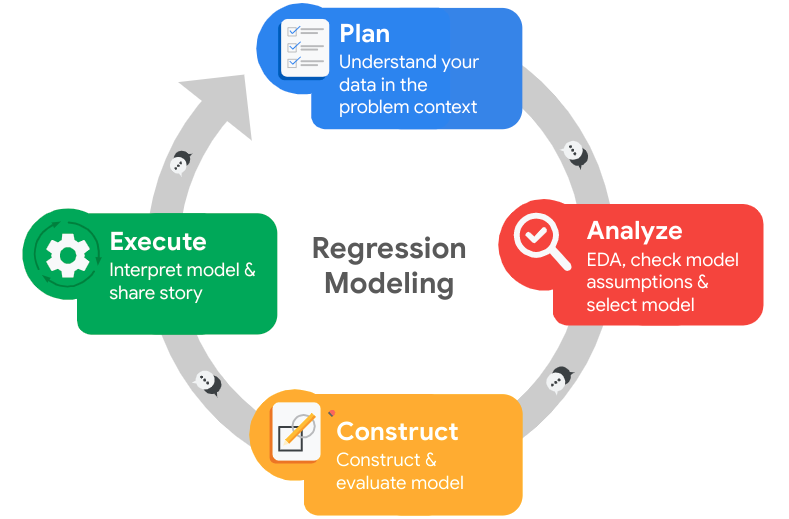

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders: HR leadership, company executives, and employees at Salifort Motors.
Goal: Identify key factors driving employee turnover and build a predictive model to improve retention.
Initial Observations: High turnover correlates with low job satisfaction, long work hours, high number of projects, salary, and lack of promotions. 
Ethical Considerations: Ensuring employee privacy, avoiding bias in predictive modeling, and maintaining data integrity.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, recall_score, precision_score, f1_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier


from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
pd.set_option('display.max_columns',None)
df0 = pd.read_csv("HR_capstone_dataset.csv")
# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0=df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                        'time_spend_company':'tenure',
                        'Work_accident':'work_accident',
                        'Department':'department'})
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df=df0.drop_duplicates(keep="first")
# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

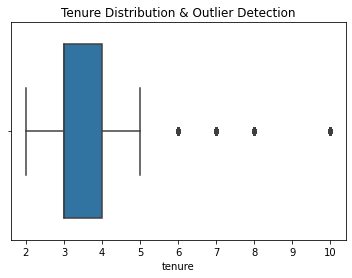

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['tenure'])
plt.title('Tenure Distribution & Outlier Detection')
plt.show()


In [12]:
# Determine the number of rows containing outliers
q1=df['tenure'].quantile(0.25)
q3=df['tenure'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print("lower_limit:",lower_limit)
print("upper_limit:",upper_limit)
outliers=df[(df['tenure']>upper_limit)|(df['tenure']<lower_limit)]
print("# rows in tenure with outliers:",len(outliers))


lower_limit: 1.5
upper_limit: 5.5
# rows in tenure with outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Employees with low satisfaction, long work hours, excessive projects, and lack of promotions are more likely to leave, while salary also impacts attrition; distributions show skewed work hours, and categorical encoding may be necessary for modeling, with EDA ensuring pattern identification, data quality, and fairness, while addressing bias, privacy, and ethical concerns.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
left_counts=df['left'].value_counts()
print(left_counts)

# Get percentages of people who left vs. stayed
left_percentages=df['left'].value_counts(normalize=True)
print(left_percentages)


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 0, 'Left Company (0 = No, 1 = Yes)')

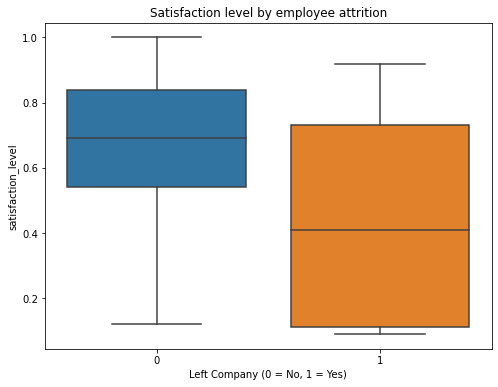

In [14]:
# Create a plot as needed
plt.figure(figsize=(8,6))
sns.boxplot(x='left',y='satisfaction_level',data=df)
plt.title("Satisfaction level by employee attrition")
plt.xlabel("Left Company (0 = No, 1 = Yes)")


Text(0.5, 1.0, 'Tenure vs attrition')

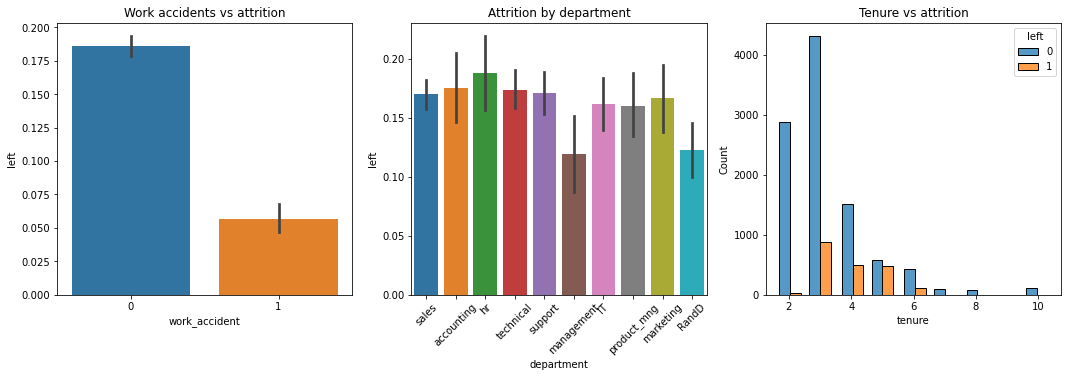

In [15]:
#Attrition vs Accidents, Departments, Tenure
fig,axes=plt.subplots(1,3, figsize=(18,5))

sns.barplot(x='work_accident',y='left',data=df,ax=axes[0])
axes[0].set_title("Work accidents vs attrition")

sns.barplot(x='department',y='left',data=df,ax=axes[1])
axes[1].set_title("Attrition by department")
axes[1].tick_params(axis='x',rotation=45)

sns.histplot(data=df, x='tenure', hue='left',multiple='dodge', shrink=8,ax=axes[2])
axes[2].set_title("Tenure vs attrition")


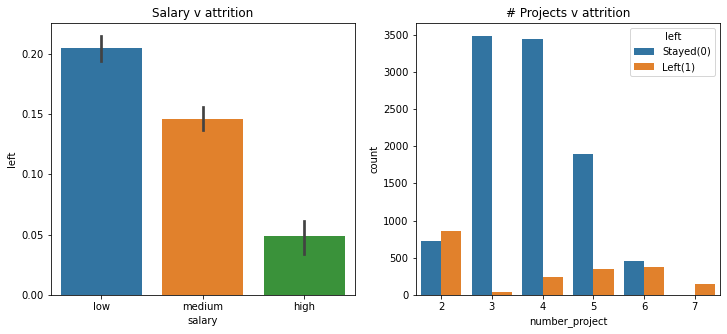

In [16]:
fig,axes=plt.subplots(1,2, figsize=(12,5))

sns.barplot(x='salary',y='left',data=df,ax=axes[0])
axes[0].set_title("Salary v attrition")

sns.countplot(x='number_project',data=df,hue='left',ax=axes[1])
axes[1].set_title("# Projects v attrition")
axes[1].legend(title="left",labels=["Stayed(0)","Left(1)"])

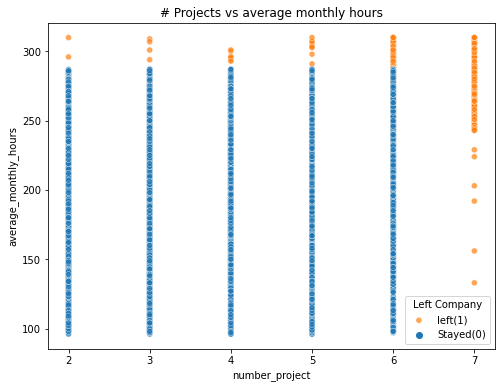

In [17]:
# Do more projects = more hours?
plt.figure(figsize=(8,6))
sns.scatterplot(x='number_project',y='average_monthly_hours',data=df,hue=df['left'], alpha=0.7)
plt.title("# Projects vs average monthly hours")
plt.legend(title="Left Company",labels=["left(1)","Stayed(0)"])
plt.show()

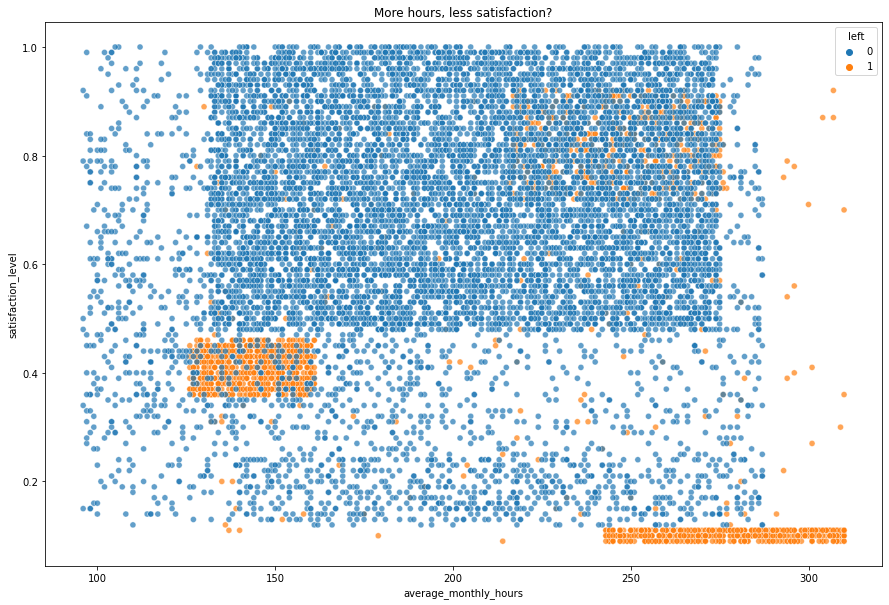

In [18]:
#Satisfaction level v average monthly hours
plt.figure(figsize=(15,10))
sns.scatterplot(x='average_monthly_hours',y='satisfaction_level',data=df,hue='left',alpha=0.7)
plt.title("More hours, less satisfaction?")
plt.show()

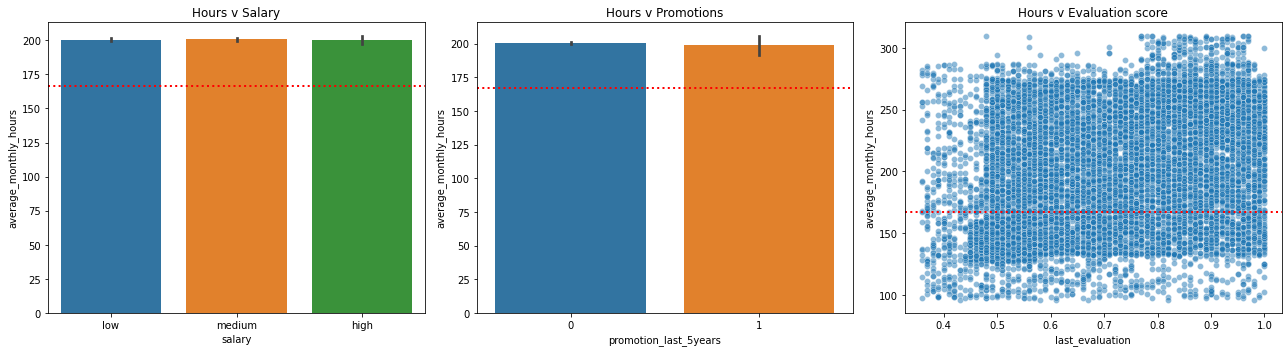

In [19]:
#How do average monthly hours influence salary/promotions/evalscores?
# 40 hour workweeks 2 weeks vacation would be 50 weeks *40 hr weeks /12months = 166.67 hours per month
fig,axes=plt.subplots(1,3, figsize=(18,5))

sns.barplot(x='salary',y='average_monthly_hours',data=df, ax=axes[0])
axes[0].set_title("Hours v Salary")
axes[0].axhline(y=166.67,color="red", linestyle='dotted',linewidth=2)

sns.barplot(x='promotion_last_5years',y='average_monthly_hours',data=df, ax=axes[1])
axes[1].set_title("Hours v Promotions")
axes[1].axhline(y=166.67,color="red", linestyle='dotted',linewidth=2)

sns.scatterplot(x='last_evaluation',y='average_monthly_hours',data=df, ax=axes[2],alpha=0.5)
axes[2].set_title("Hours v Evaluation score")
axes[2].axhline(y=166.67,color="red", linestyle='dotted',linewidth=2)
plt.tight_layout()
plt.show()

In [20]:
#just to look
df_7_projects=df[df['number_project']==7][['average_monthly_hours','satisfaction_level','last_evaluation']]
df_7_projects.describe()


,average_monthly_hours,satisfaction_level,last_evaluation
count,145.000000,145.000000,145.000000
mean,275.620690,0.116690,0.863517
std,27.596817,0.074806,0.097322
min,133.000000,0.090000,0.460000
25%,260.000000,0.100000,0.830000
50%,281.000000,0.100000,0.880000
75%,296.000000,0.110000,0.930000
max,310.000000,0.660000,0.970000


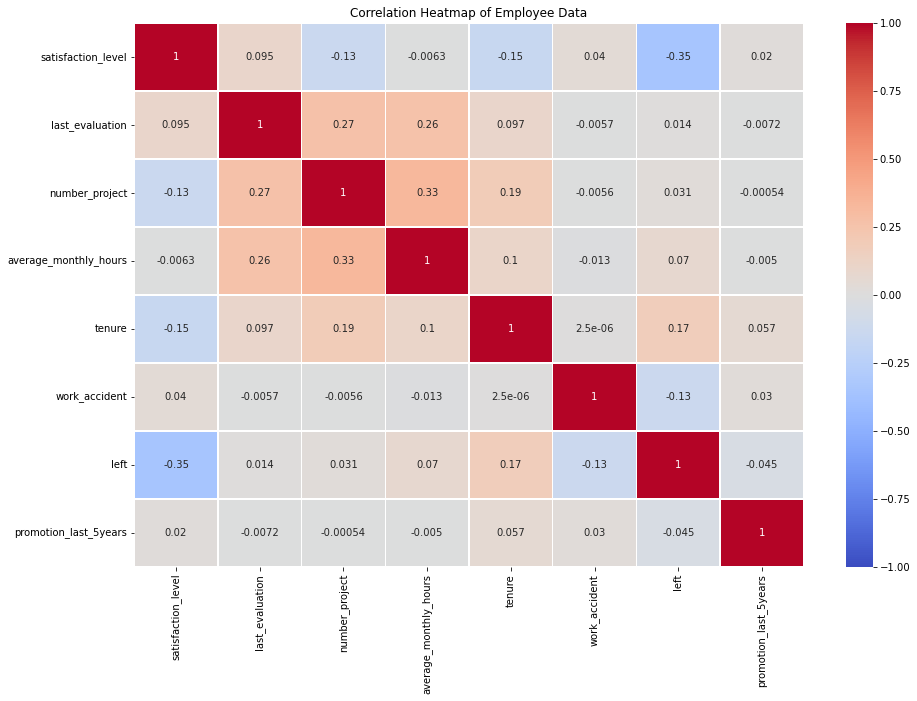

In [21]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(df.corr(), annot=True,vmin=-1,cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Employee Data")
plt.show()

### Insights

Satisfaction level has a strong impact on leaving. 
There are outliers regarding tenure, and employees with shorter tenures leave more frequently. 
There doesnt seem to be any specific department that stands out for attrition. 
Employees with low salaries left significantly more often than those with high salaries.
The ideal number of projects is between 3 and 5. All employees with 7 projects left, regardless of hours worked.
Employees who worked TOO MANY hours were more likely to leave. 
There is no benefit for overworking; employees who worked long hours did not recieve higher salaries, more promotions, or better evaluation scores. 

Looking at a specific key risk group (employees with 7 projects):
Worked an average of 276 hours/month (the range was 133-310 hours; but 75% averaged 296 hours)
Satisfaction levels on average were 0.117. critically low. range is from 0.09 to 0.66. but 75% had </= 0.11. 
Last evaluation was 0.86 on average, indicating high performers. the lowest score of 0.46 still isnt terrible; and 75% had a score of at least 0.83. 
They were highly dissatisfied and were overworked. Despite working exessive hours and being miserable, they were still evaluated as strong workers. 

Key Takeaways: 
Employees working long hours, many projects, and have high disatisfaction levels is indicative of leaving.  
Working long hours also doesnt lead to promotions, higher salary, or higher evaluation scores. 
This seems like a terrible place to work.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Independent variable chosen for the model was left (stayed or left). Model assumptions were evaluated, and while the model fits reasonably well, improvements could be made by addressing imbalance and using alternatives: in this case we could next run a RandomForest. Using previous course activities were helpful for completing this activity. Ethical considerations focused on avoiding bias, ensuring fair predictions, and maintaining employee data privacy. 

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We are trying to predict whether an employee leaves (1) or stays (0). This is a binary classification problem. 

### Identify the types of models most appropriate for this task.

Best models for this task would be Logistic Regression or Decision Tree. 
While the decision tree can be prone to overfitting, it is also better for identifying key decision rules leading to attrition. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [22]:
# Preprocessing
df.info()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['department']=le.fit_transform(df['department'])
df['salary']=le.fit_transform(df['salary'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  

In [23]:
X=df.drop(columns=['left'])
y=df['left']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
#Instantiate Decision Tree
clf=DecisionTreeClassifier(random_state=0)
#Assign discionary of hyperparameters 
cv_params={'max_depth':[3,5,10,15,None],
           'min_samples_leaf':[1,2,5,10],
           'min_samples_split':[2,5,10,20]
          }
#Assign dictionary of scoring metrics
scoring={'accuracy','precision','recall','f1','roc_auc'}
#Instantiate GridSearch
clf1=GridSearchCV(clf,cv_params,scoring=scoring, cv=4, refit='roc_auc')

In [25]:
#Fit the model to the training data
clf1.fit(X_train,y_train)
#Check best parameters
clf1.best_params_
#Check best auc score on cv
clf1.best_score_

0.9716611634567066

In [27]:
print("Best Parameters:",clf1.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [28]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary maps input to actual
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get results from cv and put into a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate row of df with max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract the metrics from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [29]:
#get the cv scores
clf1_cv_results=make_results('Decision tree cv',clf1,'auc')
clf1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision tree cv,0.951735,0.907827,0.929194,0.976648,0.971661


In [30]:
#Predict on test data
y_pred = clf1.best_estimator_.predict(X_test)
y_pred_proba = clf1.best_estimator_.predict_proba(X_test)[:,1]

In [31]:
#Evaluate on test set
from sklearn.metrics import classification_report, roc_auc_score

# Print classification report
print(classification_report(y_test, y_pred))

# Print AUC Score
print("Test AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2526
           1       0.96      0.92      0.94       472

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998

Test AUC Score: 0.9757886623186656


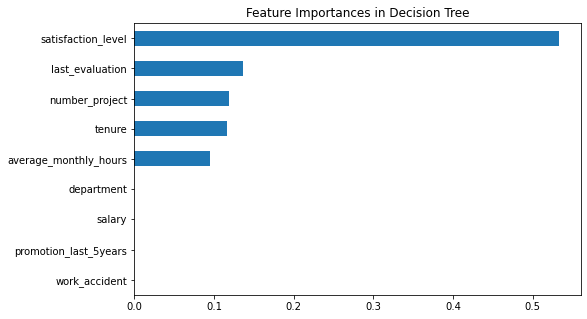

In [32]:
# Get feature importances
feature_importances = pd.Series(clf1.best_estimator_.feature_importances_, index=X_train.columns)

# Sort and visualize
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importances in Decision Tree")
plt.show()


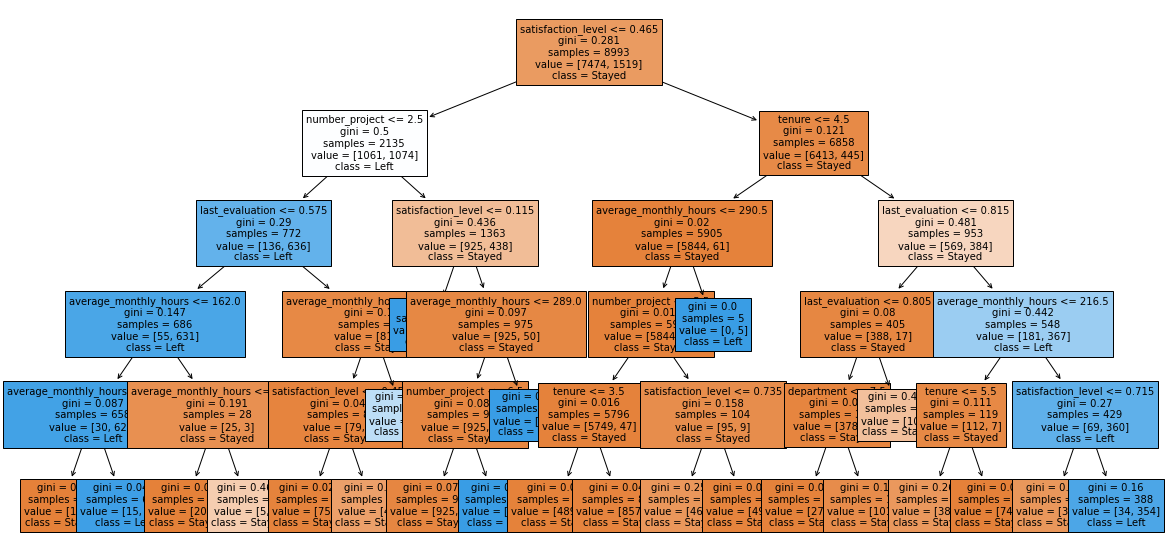

In [33]:
#Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf1.best_estimator_, feature_names=X_train.columns, class_names=["Stayed", "Left"], filled=True, fontsize=10)
plt.show()


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Key insights: satisfaction levels and workloads (excessive hours and many projects) increases liklihood of leaving, despite performance scores. 
low salaray employees leave at a much higher rate than medium and high salaray employees. Business recommendations include improving job satisfaction, and implementing a work life balance. They should review the compensation structure, as well as recognize and reward high performers. Next steps could include conducting focus groups with high risk employees, optimize project allocation, and implement targeted retention incentives. 


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
High accuracy (0.98) - it is correctly classifying most employees
Strong precision and recall for both classes
Class 0(stayed) precision:0.99, Recall:0.99 (Very few false positives)
Class 1(left) precision:0.96, recall:0.92 Capturing most employees who left. 
High AUC score (0.9758) - The model does exceptional job at distinguishing between employees who stay and those who leave. 
Performance on test data is slightly better than cv:0.9716 v 0.9758 auc), meaning the model is not overfitting. 

### Conclusion, Recommendations, Next Steps

Key insights: satisfaction levels and workloads (excessive hours and many projects) increases liklihood of leaving, despite performance scores. 
low salaray employees leave at a much higher rate than medium and high salaray employees. Business recommendations include improving job satisfaction, and implementing a work life balance. They should review the compensation structure, as well as recognize and reward high performers. Next steps could include conducting focus groups with high risk employees, optimize project allocation, and implement targeted retention incentives. 


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.